In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime

In [ ]:
df=pd.read_csv("takehome_user_engagement.csv")
df

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


*Checking for adopted (who has logged into the product on three seperate days in at least one seven day period)


Changing time_stamp in dataframe to pandas datetime format...

In [ ]:
df['time_stamp']=pd.to_datetime(df['time_stamp'], errors='ignore')


*Grouping Users as per weekly window and finding the visit count as per weekly time frame...

In [ ]:
g= df.groupby('user_id')
date = g.rolling('7D', on='time_stamp')['visited'].count()
date=date.to_frame().reset_index()

In [ ]:
date

,user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,1.0
1,2,2013-11-15 03:45:04,1.0
2,2,2013-11-29 03:45:04,1.0
3,2,2013-12-09 03:45:04,1.0
4,2,2013-12-25 03:45:04,1.0
...,...,...,...
207912,11996,2013-09-06 06:14:15,1.0
207913,11997,2013-01-15 18:28:37,1.0
207914,11998,2014-04-27 12:45:16,1.0
207915,11999,2012-06-02 11:55:59,1.0


**Finding adopted users who has logged into the product on three seperate days in a atleast one seven day period...


In [ ]:
def adp_user(adopted):
  adopted=adopted.groupby('user_id')['visited'].max().reset_index()
  adopted_user=adopted
  adopted_user['adopted_user']=adopted['visited'].apply(lambda x: 1 if x>=3 else 0)
  return adopted_user
adopted_user=adp_user(date)

In [ ]:
adopted_user

,user_id,visited,adopted_user
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0
...,...,...,...
8818,11996,1.0,0
8819,11997,1.0,0
8820,11998,1.0,0
8821,11999,1.0,0


In [ ]:
adopted_user.adopted_user.value_counts()


0    7221
1    1602
Name: adopted_user, dtype: int64

In [ ]:
adopted_user.drop('visited',axis=1,inplace=True)
adopted_user.rename({'user_id':'object_id'},axis=1,inplace=True)
adopted_user.set_index("object_id", inplace = True)

**Reading the takehome_user file and merging the adopted uder dataframe with it...

In [ ]:
df1=pd.read_csv("takehome_users.csv",encoding='latin-1')
df1

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [ ]:
user=df1.join(adopted_user,how='left',on='object_id')
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted_user                8823 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.0+ MB


In [ ]:
user.fillna(0,inplace=True)


***Data cleaning...

In [ ]:
user['last_session_creation_time'] =  user['last_session_creation_time'].apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d %H:%M:%S'))
user['last_session_creation_time'] = pd.to_datetime(user['last_session_creation_time'])

In [ ]:
user.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [ ]:
user['creation_time'] = user['creation_time'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
user['creation_time'] = pd.to_datetime(user['creation_time'])
user.head()
     

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [ ]:
src=list(user['creation_source'].unique())
for i in range(len(src)):  
    user['creation_source']=user['creation_source'].replace({src[i]:i})
     

In [ ]:
user.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,2013-01-22 10:14:20,0,0,193,5240.0,0.0


***Finding Alternative days...

In [ ]:
user['active_days']=(user['last_session_creation_time'].sub(user['creation_time'])).dt.days
col =user.pop('active_days')
user.insert(9,'active_days', col)
for i in range(len(user['active_days'])):
   if user['active_days'][i]<0:
      user['active_days'][i]=0


<ipython-input-63-54b1387bfea8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user['active_days'][i]=0


In [ ]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,active_days,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,2014-04-22 03:53:30,1,0,11,0,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,2014-03-31 03:45:04,0,0,1,136,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2013-03-19 23:14:52,0,0,94,0,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,2013-05-22 08:09:28,0,0,1,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,2013-01-22 10:14:20,0,0,193,5,5240.0,0.0


*** Finding corelation between all columns with the adopted user 

In [ ]:
user.corr()['adopted_user']


object_id                     0.005750
creation_source              -0.029121
opted_in_to_mailing_list      0.008097
enabled_for_marketing_drip    0.004653
org_id                        0.064523
active_days                   0.797344
invited_by_user_id            0.021596
adopted_user                  1.000000
Name: adopted_user, dtype: float64

***Its seen from above that following column has more correlation to adopted_user...

1)org_id

2)invited_by_user_id

3)opted_in_to_mailing_list

4)enabled_for_marketing_drip

5)active_days



****Exploratory Data Analysis****


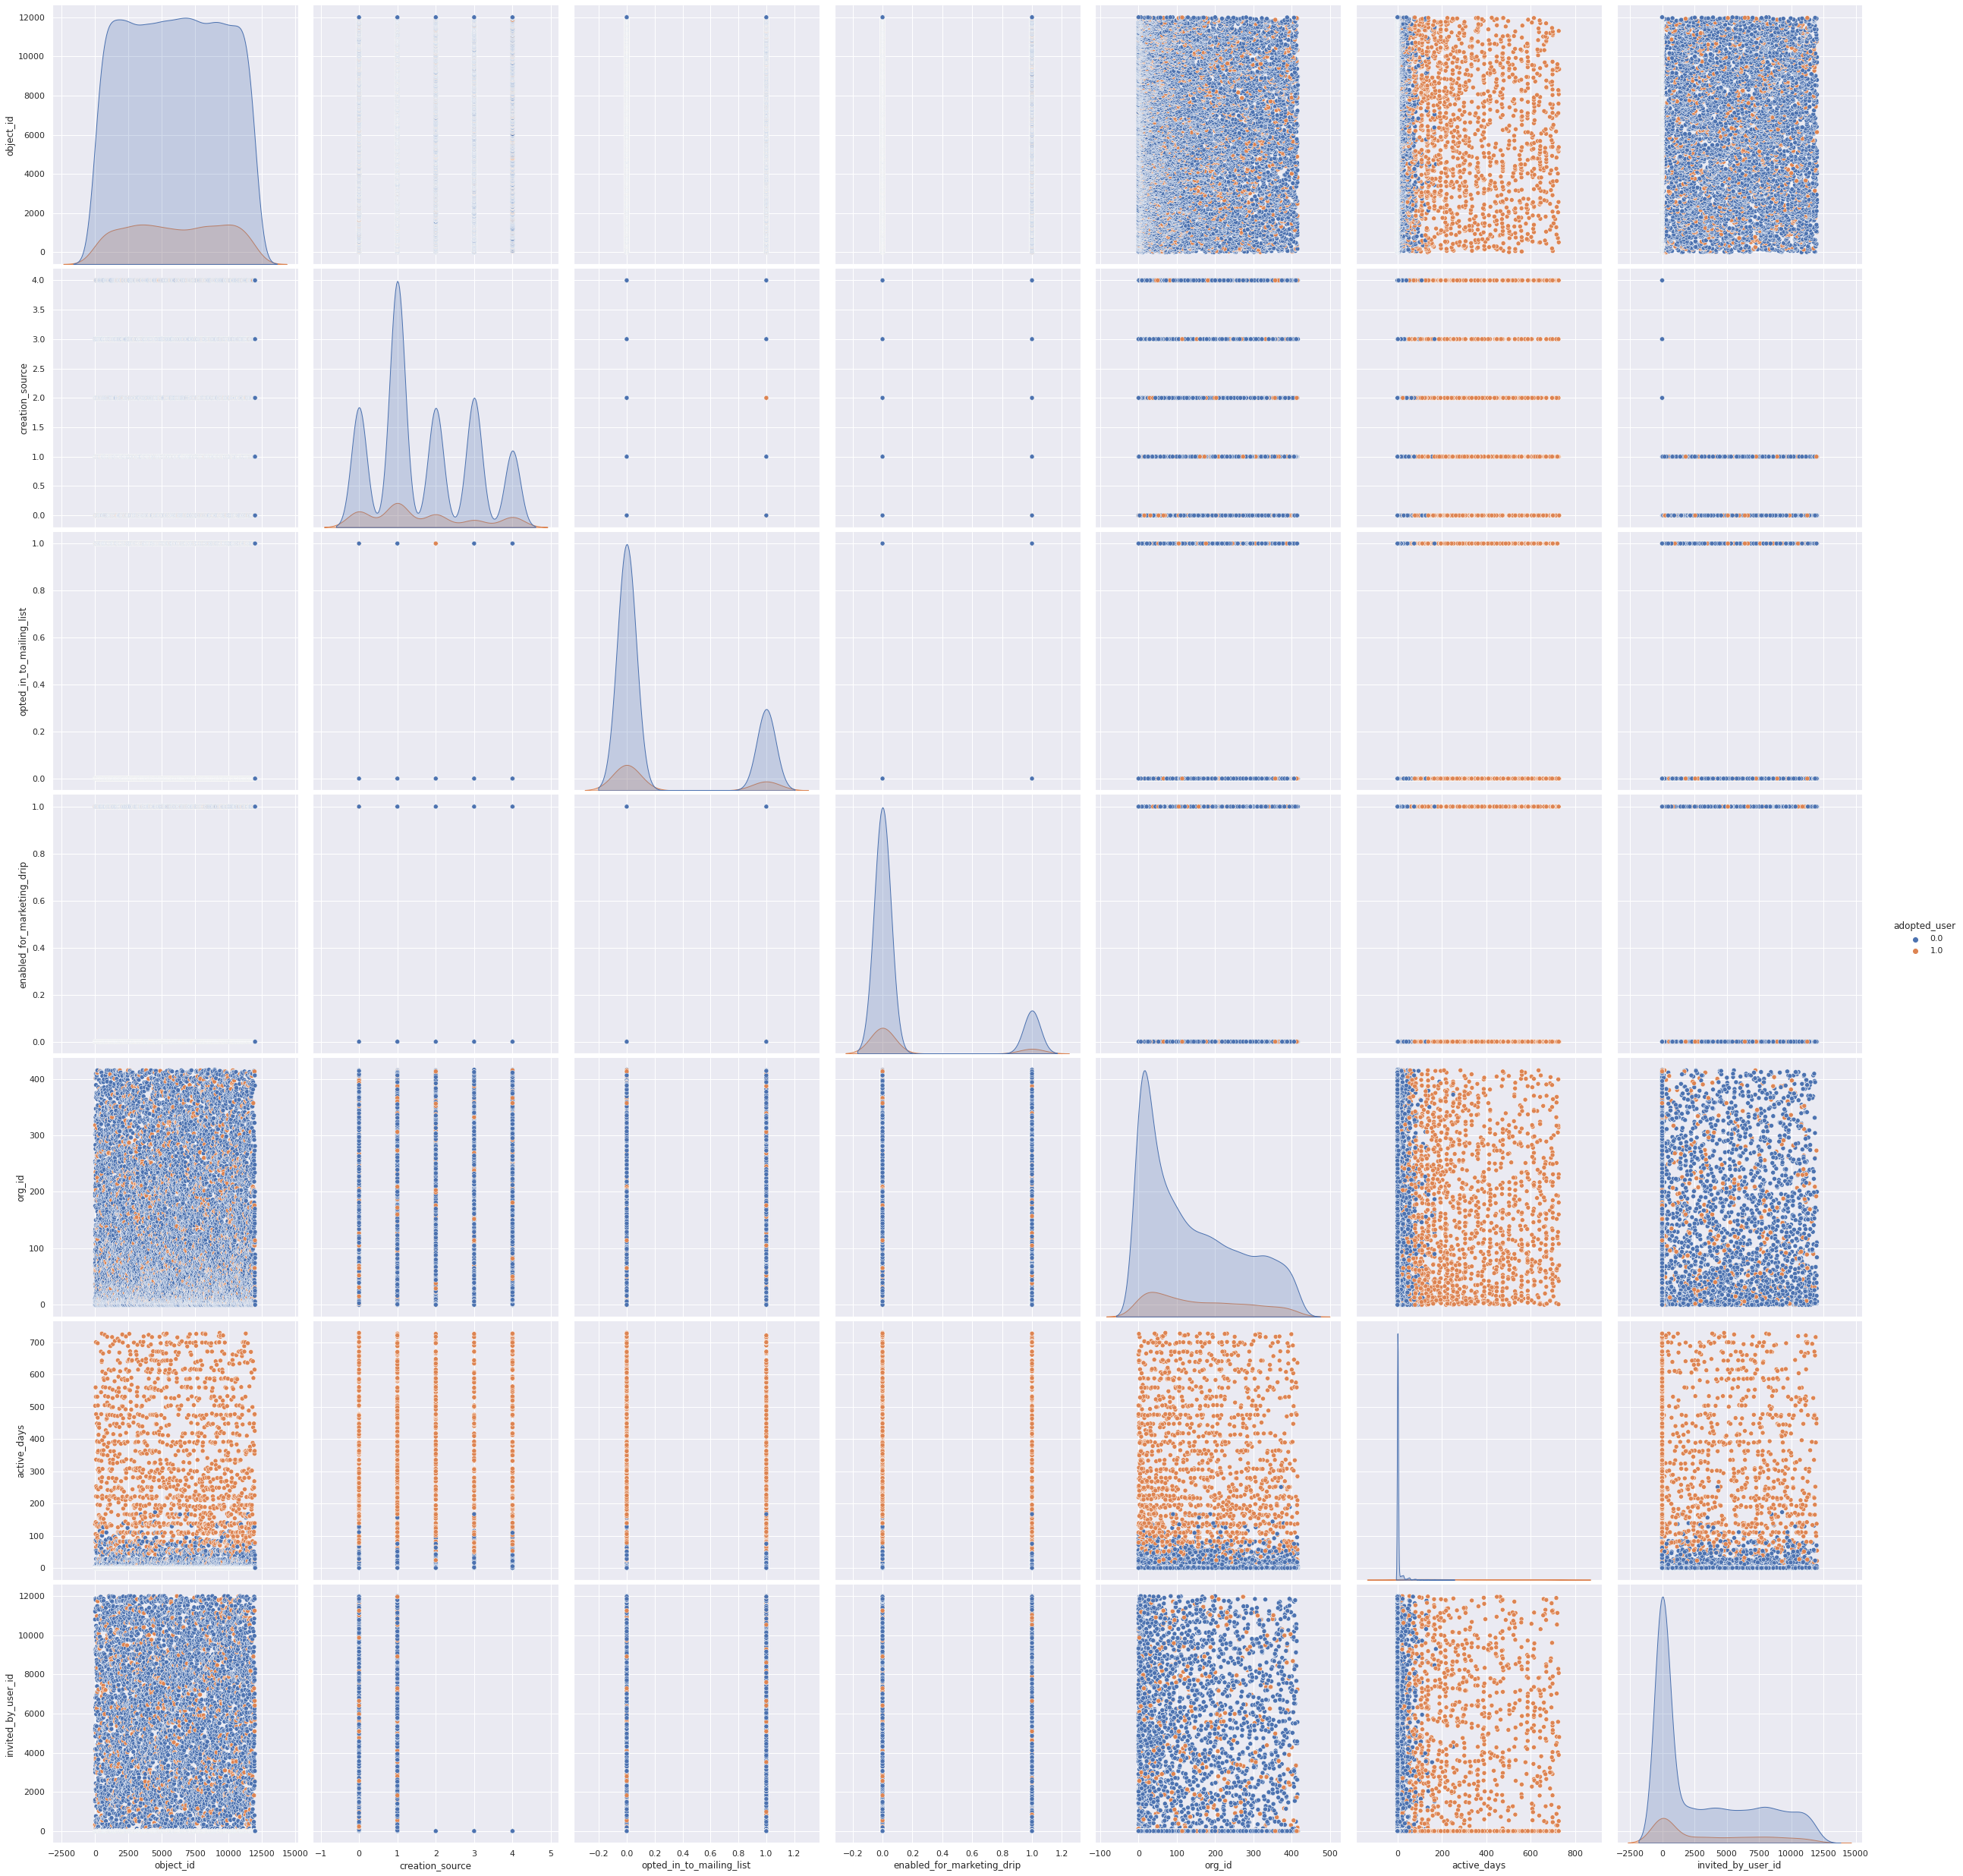

In [ ]:
sns.pairplot(user, hue="adopted_user",height=5)
plt.show()

****From the above plot we can conclude org_id, invited_by_id, opting to mail list, enable for marketing drip, active_days and creation source are the feautures which can seperate the data very well.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


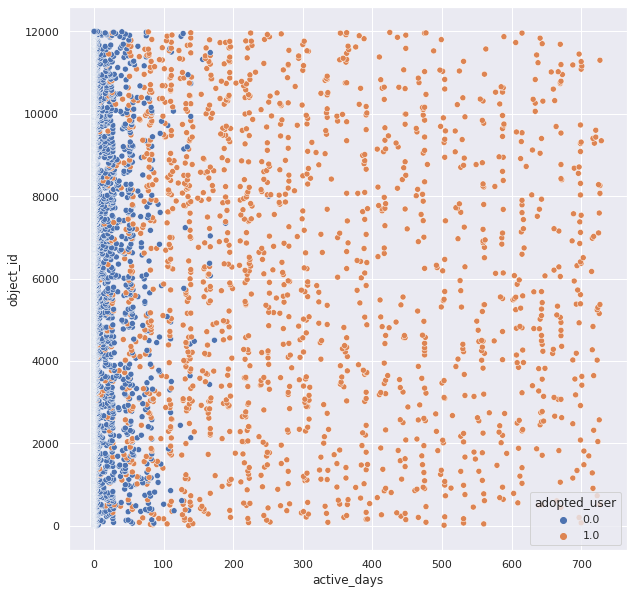

In [ ]:
figure=plt.figure(figsize=(10,10))
sns.scatterplot(user['active_days'],user['object_id'],user['adopted_user'])
plt.show()

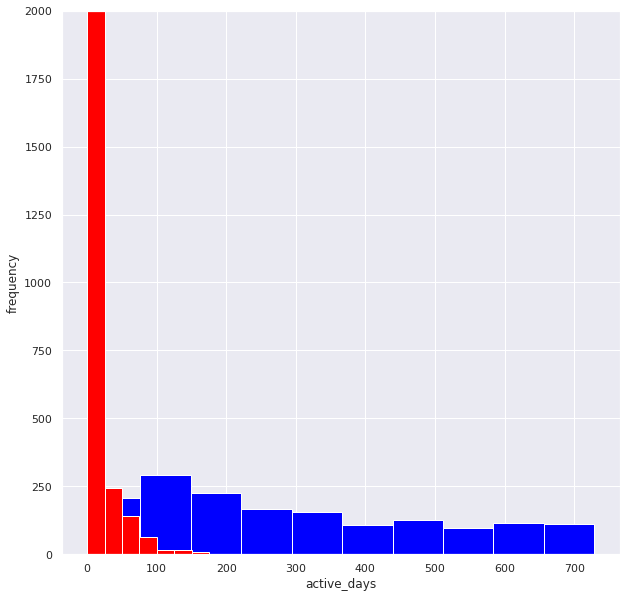

In [ ]:
fig=plt.figure(figsize=(10,10))
plt.hist(user.active_days[user['adopted_user']==1],color='blue')
plt.hist(user.active_days[user['adopted_user']==0],color='red')
plt.xlabel("active_days")
plt.ylabel("frequency")
plt.ylim(0,2000)
plt.show()

****Object_id with more active time are mostly adopted users and more active days has more adopted users...


In [ ]:
arr=list(df1.creation_source.unique())
ind = np.arange(len(arr)) 
     

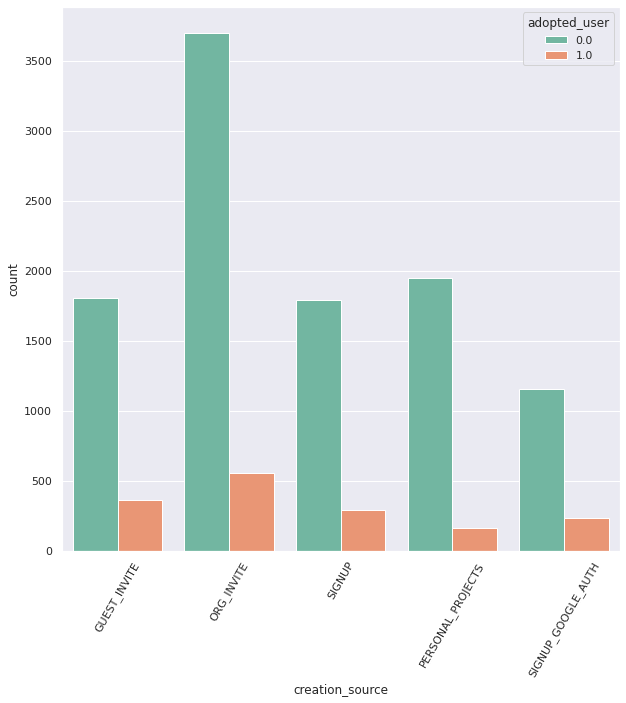

In [ ]:
fig=plt.figure(figsize=(10,10))
sns.countplot(x='creation_source', data=user,hue='adopted_user', palette='Set2')
plt.xticks(ind,labels=arr,rotation=60)
plt.show()

**** Creation source doesn't have much impact on adopted user...

**** Let us try the Logistic regression and find important features...

In [ ]:
import statsmodels.api as sm


In [ ]:
x=user[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','active_days','invited_by_user_id']]
y=user['adopted_user']

In [ ]:
x_cons=sm.add_constant(x)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x_log=sm.Logit(y,x_cons)
res_log=x_log.fit()
res_log.summary()

Optimization terminated successfully.
         Current function value: 0.073924
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           adopted_user   No. Observations:                12000
Model:                          Logit   Df Residuals:                    11993
Method:                           MLE   Df Model:                            6
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.8119
Time:                        10:23:36   Log-Likelihood:                -887.09
converged:                       True   LL-Null:                       -4715.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.0893      0.233    -21.834      0.000      -5.546      -4.632
creation_source                0.0019      0.071      0.026      0.979      -0.137       0.141
opted_in_to_mailing_list       0.2305      0.183      1.261      0.207      -0.128       0.589
enabled_for_marketing_drip    -0.1287      0.223     -0.578      0.563      -0.565       0.308
org_id                         0.0012      0.001      2.170      0.030       0.000       0.002
active_days                    0.0629      0.002     34.602      0.000       0.059       0.067
invited_by_user_id          1.611e-05   2.36e-05      0.683      0.495   -3.01e-05    6.23e-05
==============================================================================================
"""

In [ ]:
print("==================Regression Coefficients are:========================'\n\n")
r=res_log.params[1:]
print(res_log.params[1:],'\n\n')
con_mat=res_log.pred_table()
con_mat
print("==================Accuracy on training data:========================'\n\n")
accuracy_train=100*(con_mat[0,0]+con_mat[1,1])/con_mat.sum()
print("Accuracy : ",accuracy_train)

==================Regression Coefficients are:========================'


creation_source               0.001879
opted_in_to_mailing_list      0.230458
enabled_for_marketing_drip   -0.128720
org_id                        0.001196
active_days                   0.062945
invited_by_user_id            0.000016
dtype: float64 


==================Accuracy on training data:========================'


Accuracy :  97.45833333333333


In [ ]:
result=r.to_frame().reset_index()
a=list(result['index'])
b=list(result[0])

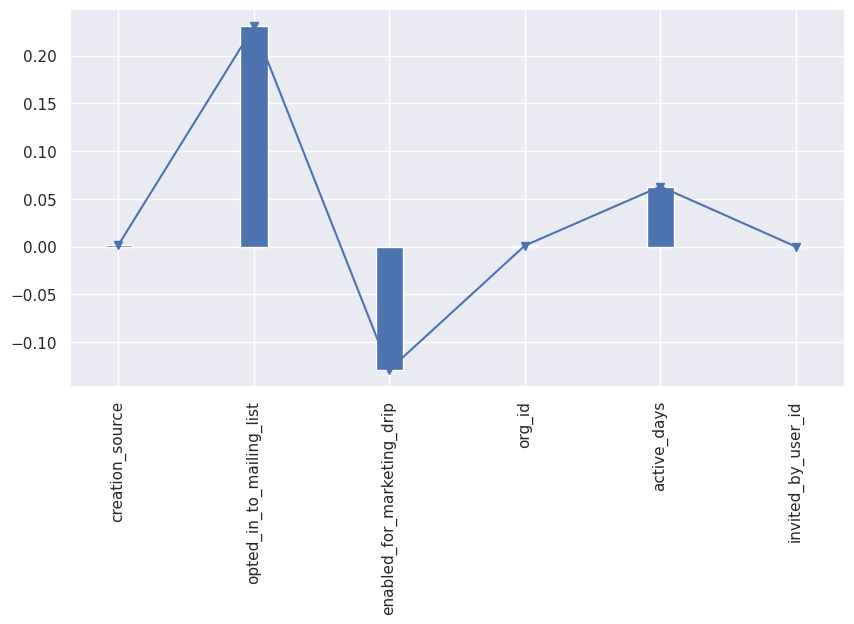

In [ ]:
fig=plt.figure(figsize=(10,5),dpi=100)
plt.plot(a,b,marker='v')
plt.bar(a,b,width=0.2)
plt.xticks(rotation=90)
plt.show()
     

******Results
   I used the algorithm Logistics Regression since the user is adopted (1) or not (0). The features are 'creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'days_since_signup',active_days,invited_by_user_id.




> Accuracy score and regression coefficients are:


















In [ ]:
print("==================Accuracy on training data:========================'\n\n")
print("Accuracy : ",accuracy_train,'\n\n')
print("==================Regression Coefficients are:========================'\n\n")
print(res_log.params[1:])

==================Accuracy on training data:========================'


Accuracy :  97.45833333333333 


==================Regression Coefficients are:========================'


creation_source               0.001879
opted_in_to_mailing_list      0.230458
enabled_for_marketing_drip   -0.128720
org_id                        0.001196
active_days                   0.062945
invited_by_user_id            0.000016
dtype: float64


****Observation
1)-From the above plot its clear that Opting_into_mailing_list and and active days increase the odds of being adopted user

2)-Others like creation_source,org_id and invited by user only has slight impact in increasing the odds of adopted user.

3)-Only the enabling_for marketing_drip has odds of nat being an adopted user,


****Future Research/Data:
Further informations that helps to increase the odds of being the adopted user can be

1)-Gender that has more adopted user

2)-Age

3)-organisation that has more adopted user

4)-Particular field to which the user belong that attracts them to become an adopted user

5)-Location of the user

6)-salary details